# Real Disposable Income and Savings
Given that personal consumption expenditures make up about 67.6% of US GDP it is interesting to analyze dynamics in the disposable personal income of US residents and their savings rate. 

Throughout this notebook I use real measures (i.e. chained US dollars) and ratios.

### Terminology
* **Personal income**: All income of an individual from labor, rentals, investments, etc, as well as government social benefits
* **Disposable personal income**: `Personal income` - `Taxes`
* **Personal savings**: `Disposable personal income` - `Personal consumption expenditures` - `Interest payments` - `Current transfer payments`. Interest payments are mostly mortgage payments and payments on credit cards. Current transfer payments include transfers to and from the government.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [11]:
MEAN_LEVEL_OF = 'Mean level of '
TAX_TO_INCOME = 'Taxes to Income'
PSR = 'Personal Saving Rate'
INTEREST_PAYMENTS_TO_DPI = 'Interest payments to Disposable personal income'
SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME = 'Net contribution of Government to Disposable income'
MEAN_LEVEL_OF_SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME = MEAN_LEVEL_OF + SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME
REAL_DISPOSABLE_INCOME_GRAPH_TITLE = 'Real Disposable Personal Income per Capita'
SAVINGS_RATE_GRAPH_TITLE = 'Personal saving as a percentage of disposable personal income'
MEAN_LEVEL_OF_SAVINGS_RATE = MEAN_LEVEL_OF + 'Savings rate'
MEAN_LEVEL_OF_INTEREST_PAYMENTS_TO_DPI = MEAN_LEVEL_OF + INTEREST_PAYMENTS_TO_DPI

In [4]:
data = web.get_data_fred(['A229RX0', 'PSAVERT', 'PI', 'W055RC1', 'A063RC1', 'A061RC1', 'DSPI',
                          'B069RC1', 'W062RC1M027SBEA'], report_start, report_end)

data[TAX_TO_INCOME] = (data.W055RC1 + data.W062RC1M027SBEA) / data.PI
data[SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME] = (data.A063RC1 - data.A061RC1 - data.W055RC1) / data.DSPI
data.PSAVERT /= 100.
data[INTEREST_PAYMENTS_TO_DPI] = data.B069RC1 / data.DSPI

data.rename(columns={'A229RX0': 'Real Disposable Personal Income per Capita',
                     'PSAVERT': PSR, 'PI': 'Personal Income',
                     'W055RC1': 'Personal current taxes',
                     'A063RC1': 'Government social benefits to persons',
                     'A061RC1': 'Contributions for government social insurance',
                     'DSPI': 'Disposable Personal Income',
                     'B069RC1': 'Personal interest payments',
                     'W062RC1M027SBEA': 'Current transfers to government'
                     }, inplace=True)

In [5]:
data

,Real Disposable Personal Income per Capita,Personal Saving Rate,Personal Income,Personal current taxes,Government social benefits to persons,Contributions for government social insurance,Disposable Personal Income,Personal interest payments,Current transfers to government,Taxes to Income,Net contribution of Government to Disposable income,Interest payments to Disposable personal income
DATE,,,,,,,,,,,,
1959-01-01,13186.0,0.113,391.8,40.2,22.7,13.6,351.5,5.1,0.3,0.103369,-0.088478,0.014509
1959-02-01,13209.0,0.106,393.7,40.8,22.9,13.6,352.9,5.1,0.3,0.104394,-0.089260,0.014452
1959-03-01,13267.0,0.103,396.5,41.3,22.7,13.7,355.2,5.2,0.3,0.104918,-0.090935,0.014640
1959-04-01,13336.0,0.112,399.9,41.7,22.7,13.8,358.2,5.2,0.3,0.105026,-0.091569,0.014517
1959-05-01,13392.0,0.106,402.4,42.1,22.5,13.9,360.3,5.3,0.3,0.105368,-0.092978,0.014710
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,50128.0,0.044,23071.7,2759.4,3991.8,1814.3,20312.3,519.0,131.2,0.125288,-0.028648,0.025551
2023-09-01,50071.0,0.038,23148.5,2770.3,3977.7,1820.7,20378.2,562.8,131.5,0.125356,-0.030096,0.027618
2023-10-01,50202.0,0.041,23209.5,2762.7,3979.3,1824.0,20446.7,563.3,131.8,0.124712,-0.029707,0.027550


### Net contribution of government to disposable income of individuals
In this part of the notebook I look at the net contribution of the US government to the disposable income of individuals, i.e. social benefits they receive minus all taxes they pay. It obviously should be negative most of the time. However during the Covid pandemic there was a notable exception when the government bankrolled a large portion of the population by stepping up US public debt.

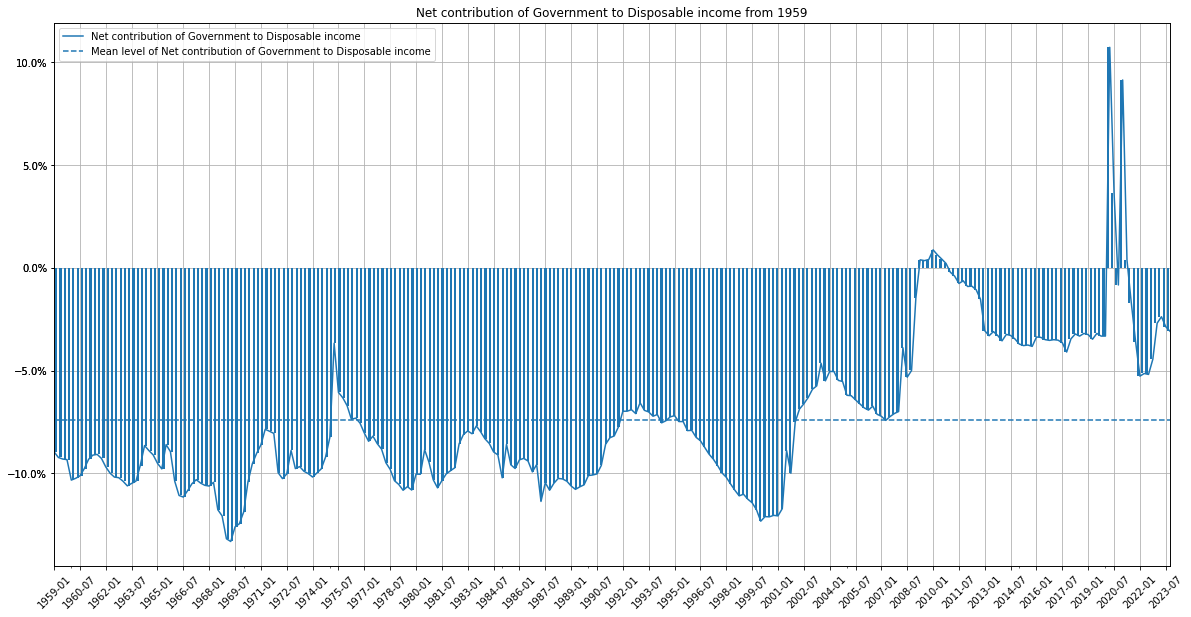

In [6]:
data_quarterly = data.resample('qs').mean()
idx = data.columns.get_loc(SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME)
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_SOCIAL_BENEFITS_TO_DISPOSABLE_INCOME)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [7]:
print(f"Mean level of Government's net contribution to disposable income since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}")

Mean level of Government's net contribution to disposable income since 1959-01-01: -7.40%


### Real disposable income per capita
The question of whether the real disposable personal income per capita is growing or not is a vital economic indicator that signals changes in the standard of living. In the below graph I depict it using chained 2017 USD.

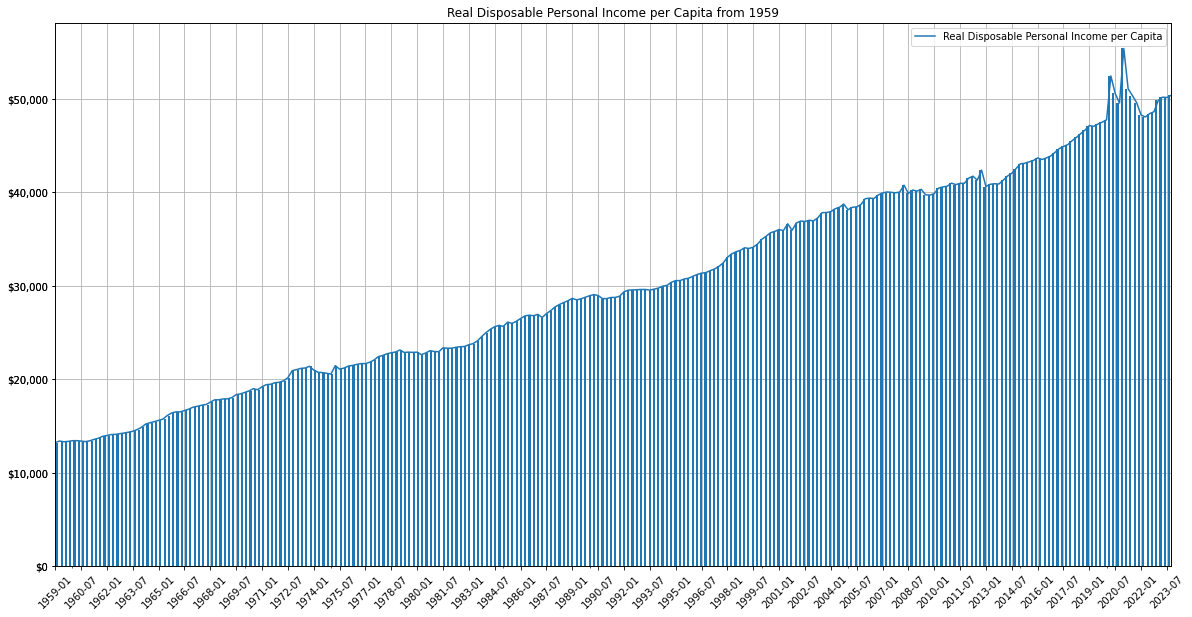

In [8]:
idx = 0
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                     title=REAL_DISPOSABLE_INCOME_GRAPH_TITLE + ' from %d' % data_quarterly.index[0].year,
                                     xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

### Savings rate
Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate" is calculated as the ratio of personal saving to DPI. Personal saving is equal to personal income less personal outlays and personal taxes; it may generally be viewed as the portion of personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.

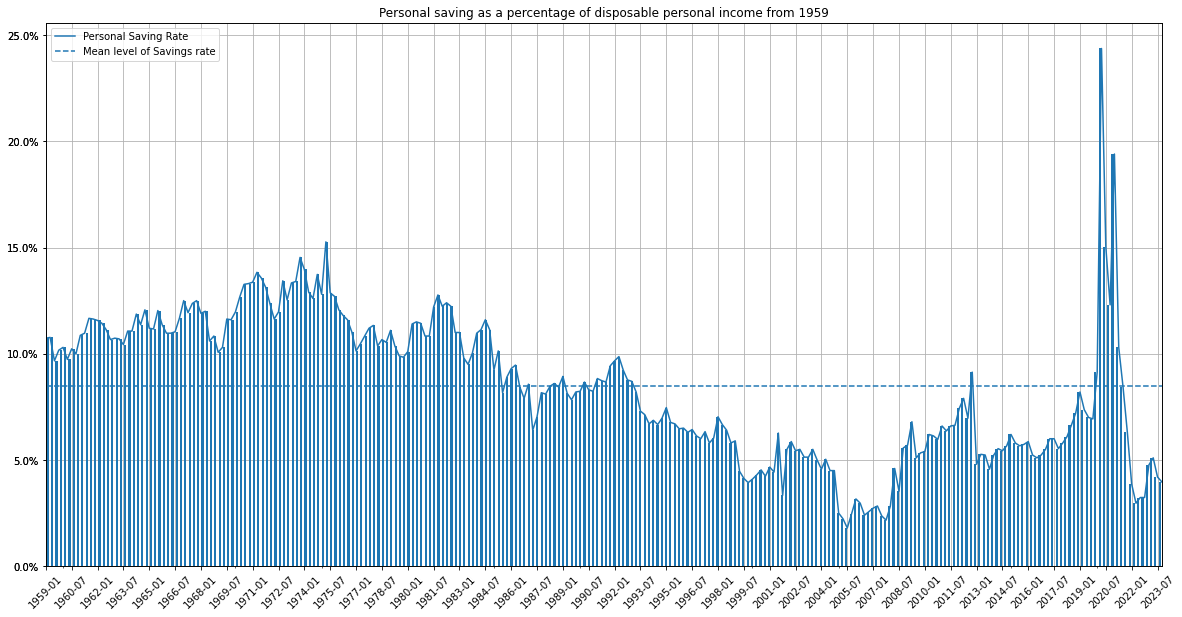

In [9]:
idx = data.columns.get_loc(PSR)
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                    title=SAVINGS_RATE_GRAPH_TITLE + ' from %d' % data_quarterly.index[0].year,
                                    xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_SAVINGS_RATE)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [10]:
print(f'Mean level of savings rate since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}')

Mean level of savings rate since 1959-01-01: 8.49%


### Percentage of disposable personal income spent on paying interest
How could it be that real disposable personal income is not decreasing while the savings rate is?

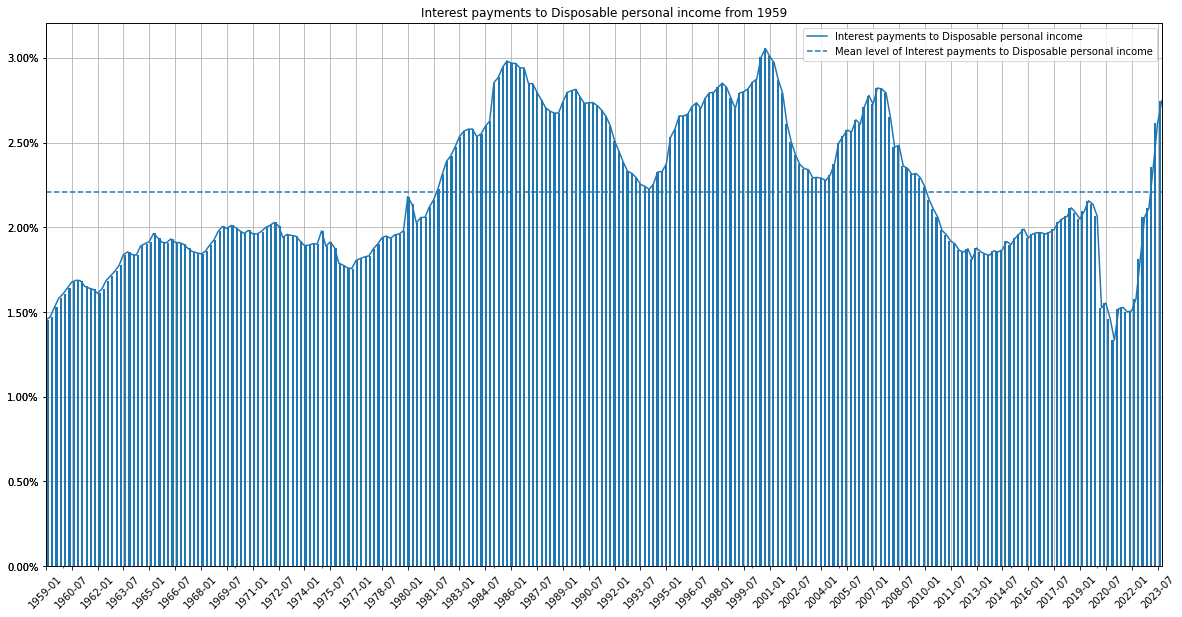

In [12]:
idx = data.columns.get_loc(INTEREST_PAYMENTS_TO_DPI)
ax = data_quarterly.iloc[:,idx].plot(figsize=(20,10), grid=True,
                                    title=INTEREST_PAYMENTS_TO_DPI + ' from %d' % data_quarterly.index[0].year,
                                    xticks=data_quarterly.index[::6], xlabel='', rot=45)
ax2 = ax.twiny()
data_quarterly.iloc[:,idx].plot.bar(ax=ax2, xlabel='', legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=data.iloc[:,idx].mean(), ls='--', c='#1f77b4', label=MEAN_LEVEL_OF_INTEREST_PAYMENTS_TO_DPI)
ax.legend()
ax2.xaxis.set_major_locator(mtick.NullLocator())
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data_quarterly.index[::6])))

In [13]:
print(f'Mean level of Interest payments to DPI since {data.index[0]:%Y-%m-%d}: {data.iloc[:,idx].mean():.2%}')

Mean level of Interest payments to DPI since 1959-01-01: 2.21%
